**Description:**

This Python code implements a Residual Dense Neural Network (DNN) to predict permeability. It uses a training dataset with train, test, and validation samples to train the model and a separate blind dataset to validate the model's performance.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import std
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.io import savemat
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential,Model
%matplotlib inline

In [ ]:
df = pd.read_excel('E:/aks haye maghale/gbdtr/data.xlsx')
df_BW = pd.read_excel('E:/aks haye maghale/gbdtr/data_bw.xlsx')

In [ ]:
Data = df.to_numpy()
Data_BW = df_BW.to_numpy()
print(Data.shape)
print(Data_BW.shape)

(6486, 8)
(3992, 8)


In [ ]:
X = Data[:, :-1]
y = Data[:, -1].reshape(-1, 1)

X_BW = Data_BW[:, :-1]
y_BW = Data_BW[:, -1].reshape(-1, 1)


print('X.shape = {}, y.shape = {}'.format(X.shape, y.shape))
print('X_BW.shape = {}, y_BW.shape = {}'.format(X_BW.shape, y_BW.shape))

X.shape = (6486, 7), y.shape = (6486, 1)
X_BW.shape = (3992, 7), y_BW.shape = (3992, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13)

In [ ]:
shape = X_train.shape[1]
inputs = keras.Input(shape= shape)
X_1 = layers.Dense(128, activation="relu")(inputs)
X_2 = layers.Dense(128, activation="relu")(X_1)
X_3 = layers.Dense(128, activation="relu")(X_2)
x   = layers.concatenate([X_1, X_3])
X_4 = layers.Dense(128, activation="relu")(x)
X_5 = layers.Dense(128, activation="relu")(X_4)
x   = layers.concatenate([X_3 ,X_5])
X_6 = layers.Dense(128, activation="relu")(x)
X_7 = layers.Dense(128, activation="relu")(X_6)
x   = layers.concatenate([X_5 ,X_7])
X_8 = layers.Dense(128, activation="relu")(x)
X_9 = layers.Dense(128, activation="relu")(X_8)
x   = layers.concatenate([X_7 ,X_9])
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1024        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          16512       dense_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
logDir = "E:\\aks haye maghale\\deep learning\\resnet_log\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("logDir:" ,logDir )
tensorboard_callback = TensorBoard(logDir)

logDir: E:\aks haye maghale\deep learning\resnet_log\20210419-193225


In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
    epochs=500, batch_size=16,callbacks = [tensorboard_callback])

Epoch 1/500
284/284 [==============================] - 1s 4ms/step - loss: 1.7134 - val_loss: 10.9732
Epoch 2/500
284/284 [==============================] - 1s 2ms/step - loss: 1.5624 - val_loss: 10.7422
Epoch 3/500
284/284 [==============================] - 1s 2ms/step - loss: 1.3387 - val_loss: 10.8845
Epoch 4/500
284/284 [==============================] - 1s 2ms/step - loss: 1.3648 - val_loss: 10.9196
Epoch 5/500
284/284 [==============================] - 1s 2ms/step - loss: 1.2918 - val_loss: 10.9048
Epoch 6/500
284/284 [==============================] - 1s 2ms/step - loss: 1.3232 - val_loss: 10.8970
Epoch 7/500
284/284 [==============================] - 1s 2ms/step - loss: 1.6436 - val_loss: 11.1036
Epoch 8/500
284/284 [==============================] - 1s 2ms/step - loss: 1.3223 - val_loss: 10.8426
Epoch 9/500
284/284 [==============================] - 1s 3ms/step - loss: 1.3506 - val_loss: 10.8396
Epoch 10/500
284/284 [==============================] - 1s 2ms/step - loss: 1.6631

In [ ]:
trainOutputs = model.predict(X_train)
testOutputs = model.predict(X_test)
alldataOutputs = model.predict(X)
BW = model.predict(X_BW)
mse_test = mean_squared_error(y_test, testOutputs)
mse_train = mean_squared_error(y_train, trainOutputs)
mse_all = mean_squared_error(y, alldataOutputs)
mse_BW = mean_squared_error(y_BW, BW)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_test))
print("The mean squared error (MSE) on train set: {:.4f}".format(mse_train))
print("The mean squared error (MSE) on all set: {:.4f}".format(mse_all))
print("The mean squared error (MSE) on Blind Well set: {:.4f}".format(mse_BW))

The mean squared error (MSE) on test set: 0.0039
The mean squared error (MSE) on train set: 0.0001
The mean squared error (MSE) on all set: 0.0013
The mean squared error (MSE) on Blind Well set: 0.0139


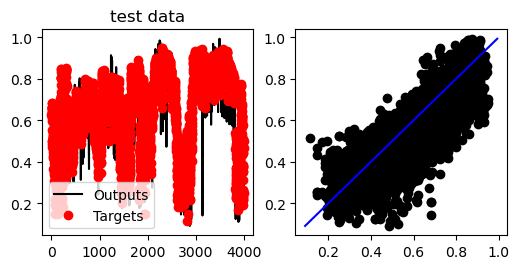

In [ ]:
plt.figure(figsize = (6,6) , dpi = 100)
plt.subplot(2,2,1)
plt.plot(BW , 'k' , label='Outputs')
plt.plot(y_BW , 'ro' , label='Targets')
plt.legend()
plt.title('test data')

plt.subplot(2,2,2)
plt.plot(y_BW,BW,'ko')
xmin = np.min([np.min(y_BW) , np.min(BW)])
xmax = np.max([np.max(y_BW) , np.max(BW)])
plt.plot([xmin , xmax] , [xmin , xmax] , 'b')

In [ ]:
mdic = {'t_BW':y_BW}
savemat("matlab_matrix_1.mat", mdic)

In [ ]:
mdic = {'y_BW':BW}
savemat("matlab_matrix_2.mat", mdic)

In [ ]:
mdic = {'y':alldataOutputs}
savemat("matlab_matrix_3.mat", mdic)

In [ ]:
mdic = {'t':y}
savemat("matlab_matrix_4.mat", mdic)

In [ ]:
mdic = {'train_output':trainOutputs}
savemat("matlab_matrix_5.mat", mdic)

In [ ]:
mdic = {'train_target':y_train}
savemat("matlab_matrix_6.mat", mdic)

In [ ]:
mdic = {'test_output':testOutputs}
savemat("matlab_matrix_7.mat", mdic)

In [ ]:
mdic = {'test_target':y_test}
savemat("matlab_matrix_8.mat", mdic)